## Team Members 

1. Jessica Mutiso
2. Brian Waweru
3. Pamela Godia
4. Hellen Mwaniki

## 1. Project Overview 

This project aims to develop a natural language chatbot capable of generating human-like responses and understanding informal customer feedback expressed in English, Kenyan Swahili and Sheng. Designed for a startup expanding into the Kenyan market, the chatbot will help the company engage users more naturally and analyze feedback from social platforms and online conversations. By training on locally relevant dialogue data  including YouTube comments and Kenyan media the system will capture the linguistic and cultural nuances often missed by standard models.



## 1.1 Problem Statement
Startups entering new markets often struggle to understand customer feedback when it's expressed in local dialects or informal language. In Kenya, much of this communication occurs in Swahili and Sheng, which combine local slang, English, and Swahili in a fluid, often unstructured manner. Existing chatbot systems trained on formal English fail to grasp the tone, intent, or meaning behind such messages. This project aims to fill that gap by building a chatbot trained specifically on real-world Kenyan conversations to interpret and respond to customer queries and feedback with local context and relevance.

## 1.2 Objectives

- Collect and preprocess Kenyan user dialogue from YouTube, social media, and local content featuring Swahili and Sheng

- Fine-tune the chatbot with foundational data for conversational structure, while emphasizing local language patterns

- Build a sequence-to-sequence model  capable of handling informal, code-switched dialogue

- Evaluate the chatbot’s performance with emphasis on contextual relevance and local understanding

- Present a working prototype that simulates real customer feedback scenarios 

## Overall EDA

In [1]:
# importing relevant notebooks 
import pandas as pd 
import numpy as np
import random
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string


## Loading & Inspecting Datasets 

In [2]:
#Reading movie_lines data 

with open("Data\movie_lines.txt", encoding='utf-8') as f:
    for _ in range(5):
        print(f.readline())


L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!

L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!

L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.

L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?

L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.



In [3]:
with open("Data\pamela-youtube_comments.csv", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline())


video_id,comment

qlZM3McwO1Q,What an incredible victory. I agree the Kenyans should have been celebrated at the end. This was an incredible performance.

qlZM3McwO1Q,❤

qlZM3McwO1Q,“Claudia is an amazonian goddess with a beautiful clam!” - Bruce Wayne

qlZM3McwO1Q,Proud of my motherland Kenya ❤❤❤and Africa.at large



In [4]:
columns = ["VideoID", "comment"]

movie_titles = pd.read_csv(
    "Data\pamela-youtube_comments.csv",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,VideoID,comment
0,"video_id,comment",NaN
1,"qlZM3McwO1Q,What an incredible victory. I agre...",NaN
2,"qlZM3McwO1Q,â¤",NaN
3,"qlZM3McwO1Q,âClaudia is an amazonian goddess...",NaN
4,"qlZM3McwO1Q,Proud of my motherland Kenya â¤â...",NaN


In [5]:
with open ("Data/brian_youtube_data_comments.csv", encoding ="utf-8") as f:
    for _ in range(5):
        print(f.readline())

Top Comment,Reply

"Apple missed the boat on AI OR... Apple is doing what it always does, waiting for others to prove a new technology, then ride in on their massive platform and take over. Time will tell which statement is true.",

"Who added the background music to the video its so fucking distracting. It sounds like nier automata bgm, that makes it impossible to focus",

16:26  FEMI KUTI !!! RAAHHH !!!,

"The greatest AI scam in history, is AI.",



In [6]:
columns = ["comment", "response"]

movie_titles = pd.read_csv(
    "Data/brian_youtube_data_comments.csv",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,comment,response
0,"ï»¿Top Comment,Reply",NaN
1,"""Apple missed the boat on AI OR... Apple is do...",NaN
2,"""Who added the background music to the video i...",NaN
3,"16:26 FEMI KUTI !!! RAAHHH !!!,",NaN
4,"""The greatest AI scam in history, is AI."",",NaN


In [7]:
## Reading the conversation data

with open("Data\movie_conversations.txt", encoding="ISO-8859-1") as f:
    for _ in range(5):
        print(f.readline())


u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']



In [8]:
# Reading movie titles data 

with open ("Data\movie_titles_metadata.txt", encoding= "ISO-8859-1") as f:
    for _ in range(5):
        print(f.readline())

m0 +++$+++ 10 things i hate about you +++$+++ 1999 +++$+++ 6.90 +++$+++ 62847 +++$+++ ['comedy', 'romance']

m1 +++$+++ 1492: conquest of paradise +++$+++ 1992 +++$+++ 6.20 +++$+++ 10421 +++$+++ ['adventure', 'biography', 'drama', 'history']

m2 +++$+++ 15 minutes +++$+++ 2001 +++$+++ 6.10 +++$+++ 25854 +++$+++ ['action', 'crime', 'drama', 'thriller']

m3 +++$+++ 2001: a space odyssey +++$+++ 1968 +++$+++ 8.40 +++$+++ 163227 +++$+++ ['adventure', 'mystery', 'sci-fi']

m4 +++$+++ 48 hrs. +++$+++ 1982 +++$+++ 6.90 +++$+++ 22289 +++$+++ ['action', 'comedy', 'crime', 'drama', 'thriller']



In [9]:
columns = ["MovieID", "Movie Title","Year", "Rating", "no_votes", "Genre"]

movie_titles = pd.read_csv(
    "Data\movie_titles_metadata.txt",
    sep=' \+\+\+\$\+\+\+ ',
    engine='python',
    names=columns,
    encoding='ISO-8859-1'
)

movie_titles.head()

,MovieID,Movie Title,Year,Rating,no_votes,Genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [10]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MovieID      617 non-null    object 
 1   Movie Title  617 non-null    object 
 2   Year         617 non-null    object 
 3   Rating       617 non-null    float64
 4   no_votes     617 non-null    int64  
 5   Genre        617 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 29.1+ KB


## Data Usage Explanation 


-  Youtube Dataset (scraped) - Help chatbot understand local expressions, slang, and questions users are actually asking

-  Cornell Dataset Teach dialog structure (turn-taking, responses), mostly in English

## Merging Youtube Datasets

In [11]:

# Loading both datasets without filtering columns yet
df1 = pd.read_csv("Data\pamela-youtube_comments.csv")
df2 = pd.read_csv("Data/brian_youtube_data_comments.csv")

# Printing column names to inspect
print("Data\pamela-youtube_comments.csv Columns:", df1.columns.tolist())
print("Data/brian_youtube_data_comments.csv Columns:", df2.columns.tolist())


Data\pamela-youtube_comments.csv Columns: ['video_id', 'comment']
Data/brian_youtube_data_comments.csv Columns: ['Top Comment', 'Reply']


In [12]:
import pandas as pd

# Loading both datasets
df1 = pd.read_csv("Data\pamela-youtube_comments.csv")    
df2 = pd.read_csv("Data/brian_youtube_data_comments.csv")  

# Cleaning df1: keeping only 'comment' and drop nulls
df1 = df1[['comment']].dropna()
df1['response'] = None  # placeholder column for consistency

# Clean df2: renaming columns and dropping nulls
df2 = df2.rename(columns={"Top Comment": "comment", "Reply": "response"})
df2 = df2[['comment', 'response']].dropna()

# Combining both dataframes 
df_combined = pd.concat([df1, df2], ignore_index=True)


print("Combined Dataset Shape:", df_combined.shape)
display(df_combined.sample(5))



Combined Dataset Shape: (26095, 2)


,comment,response
11313,This is so sad.. Women have been tormented wit...,None
5496,I have watched this video carrying yangu tote😭...,None
6447,God fight for Winnie,None
1590,I lost my 2friends who were sister and her dau...,None
8075,That man is a killer...maybe he has killed soo...,None


# Comments length Distribution 

c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


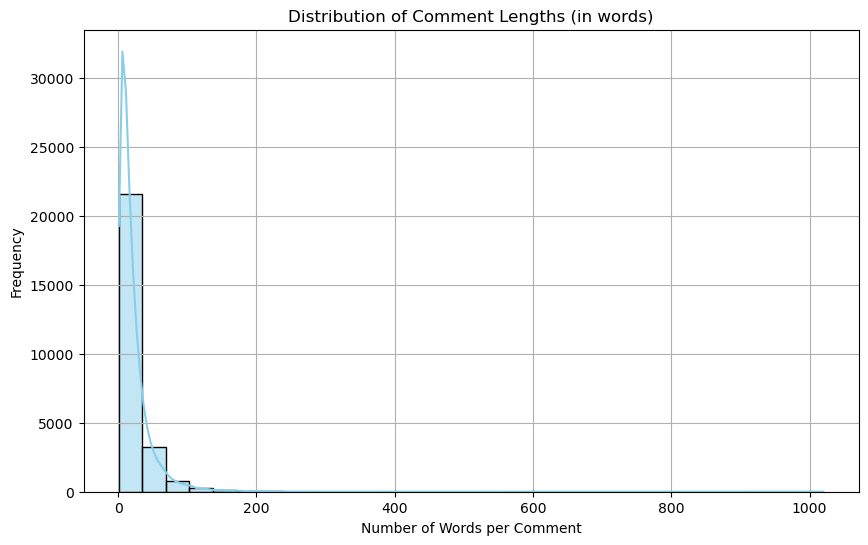

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding a new column: comment length (in words)
df_combined['comment_length'] = df_combined['comment'].apply(lambda x: len(str(x).split()))

# Plotting distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['comment_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Comment Lengths (in words)")
plt.xlabel("Number of Words per Comment")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Top words in comments 

c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


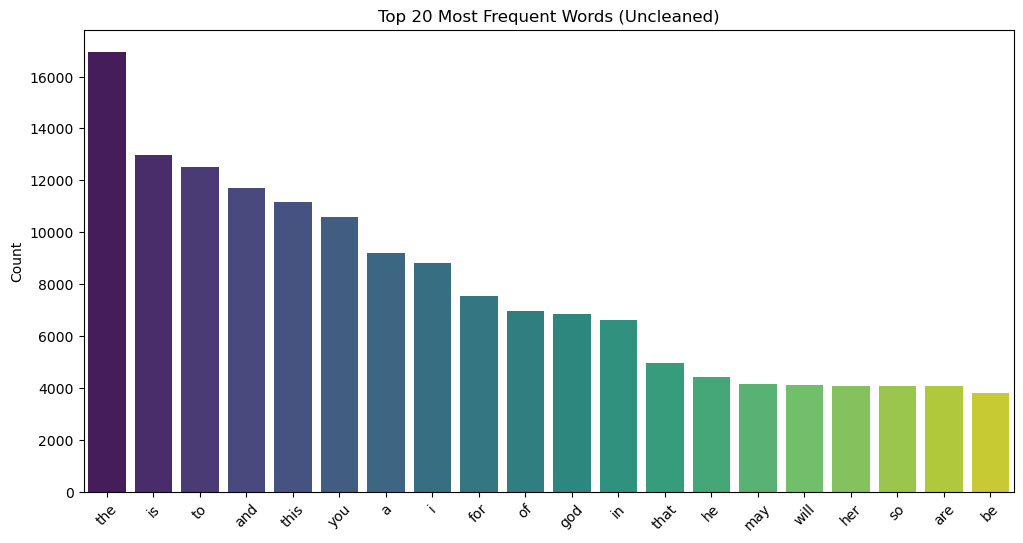

In [14]:
from collections import Counter
import string

# Combining all comments into one string
all_text = " ".join(df_combined['comment'].dropna().astype(str)).lower()

# Basic tokenization: splitting by space, removing punctuation
tokens = [word.strip(string.punctuation) for word in all_text.split()]


# Basic tokenization: splitting by space, removing punctuation
tokens = [word.strip(string.punctuation) for word in all_text.split()]
tokens = [word for word in tokens if word]  

# Count frequencies
word_freq = Counter(tokens)
top_words = word_freq.most_common(20)

# Plotting
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Most Frequent Words (Uncleaned)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


# Language Detection and preprocessing - Youtube data 

Here I want to check the amount of swahili / sheng in my youtube dataset to understand whether the data is efficient to use for training 


In [15]:
# Preparing tokenized words list

from nltk.tokenize import word_tokenize
import string


all_text = " ".join(df_combined["comment"].dropna().astype(str).tolist())

# Tokenizing
tokens = word_tokenize(all_text.lower())

# Removing punctuations
tokens = [word for word in tokens if word not in string.punctuation]


In [16]:
sheng_swahili_vocab = {
    "msee", "manze", "vile", "sasa", "buda", "nani", "kiasi", "si", "poa", "kwani",
    "hapo", "ushapata", "unadai", "ni", "aje", "nimeona", "noma", "mbogi", "beshte",
    "wasee", "ati", "ndio", "sana", "sijui", "nduthi", "wewe", "kuna", "niko", "leo",
    "kesho", "shida", "rafiki", "asante", "karibu", "mambo", "habari", "leo", "mzuri"
}


In [17]:
from collections import Counter

# Countfing all words 
word_counts = Counter(tokens)

# Counting only Swahili/Sheng words
swahili_sheng_counts = {word: count for word, count in word_counts.items() if word in sheng_swahili_vocab}

# Total words and total Swahili/Sheng
total_words = sum(word_counts.values())
total_swahili_sheng = sum(swahili_sheng_counts.values())

print(f"Swahili/Sheng word count: {total_swahili_sheng}")
print(f"Total words: {total_words}")
print(f"Swahili/Sheng word percentage: {total_swahili_sheng / total_words:.2%}")


Swahili/Sheng word count: 2786
Total words: 602079
Swahili/Sheng word percentage: 0.46%


In [18]:
from pprint import pprint

print("Top Swahili/Sheng words in dataset:")
pprint(sorted(swahili_sheng_counts.items(), key=lambda x: x[1], reverse=True)[:20])


Top Swahili/Sheng words in dataset:
[('ni', 870),
 ('sana', 518),
 ('wewe', 201),
 ('ndio', 166),
 ('si', 127),
 ('kuna', 121),
 ('ati', 116),
 ('sasa', 92),
 ('vile', 89),
 ('hapo', 85),
 ('kwani', 63),
 ('aje', 51),
 ('mambo', 41),
 ('leo', 40),
 ('sijui', 37),
 ('shida', 37),
 ('nani', 27),
 ('niko', 17),
 ('poa', 16),
 ('mzuri', 12)]


In [19]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


## Swahili words in the Yotube Combined Dataset

In [20]:
from langdetect import detect, LangDetectException
from tqdm import tqdm
import re

tqdm.pandas()

def safe_detect(text):
    try:
        text = str(text).strip()
    
        cleaned = re.sub(r'[^a-zA-Z]', '', text)  # Removing digits and punctuation, keep only alphabetic characters
        if len(cleaned) < 5:
            return "unknown"
        return detect(text)
    except LangDetectException:
        return "unknown"

df_combined["language"] = df_combined["comment"].progress_apply(safe_detect)

# Count Swahili comments (ISO 639-1 code for Swahili is 'sw')
swahili_count = df_combined[df_combined["language"] == "sw"]["comment"].count()
total = df_combined["comment"].count()

print(f"Swahili comments: {swahili_count} / {total} ({(swahili_count/total):.2%})")


100%|██████████| 26095/26095 [03:16<00:00, 132.63it/s]

Swahili comments: 1815 / 26095 (6.96%)


In [21]:
df_combined. head(10)

,comment,response,comment_length,language
0,What an incredible victory. I agree the Kenyan...,None,20,en
1,❤,None,1,unknown
2,“Claudia is an amazonian goddess with a beauti...,None,12,en
3,Proud of my motherland Kenya ❤❤❤and Africa.at ...,None,8,en
4,Damn,None,1,unknown
5,Kenya you should proud of yr self❤❤❤❤,None,7,en
6,Well done team Kenya❤,None,4,id
7,"This channel is racist! Report the channel, it...",None,24,en
8,"Congs Kenya, lots of love from Uganda",None,7,en
9,"Just WOW Kenya, what a run, what a stamina!",None,9,en


In [22]:
# Phrases with combined Swahili and English (Code-switched comments)

def detect_code_switch(text):
    try:
        langs = detect_langs(text)
        lang_set = {lang.lang for lang in langs}
        return 'en' in lang_set and 'sw' in lang_set
    except LangDetectException:
        return False


In [23]:
from langdetect import detect_langs


In [25]:
df_combined["code_switched"] = df_combined["comment"].astype(str).apply(detect_code_switch)


In [26]:
percentage = (df_combined["code_switched"].sum() / len(df_combined)) * 100
print(f"{percentage:.2f}% of comments are code-switched.")


1.88% of comments are code-switched.


## Findings from the Youtube data Inspection 

- There is Low prevalence of Swahili/Sheng (less than 0.5%) in the dataset.
- This likely meant most comments are in English, or the Swahili/Sheng vocabulary list is too small to capture what's actually Swahili/Sheng.

  Inspecting phrases with language switching show that : 
   - only a small fraction of the YouTube data contains both English and Swahili within the same comment.

## Introducing dataset with more swahili words 

I decided to load the allenai/c4 dataset from Hugging Face.


In [27]:
!pip install -q datasets


In [28]:
from datasets import load_dataset

c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
swahili_data = load_dataset("allenai/c4", name="sw", split="train[:1%]")

Using the latest cached version of the dataset since allenai/c4 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'sw' at C:\Users\helle\.cache\huggingface\datasets\allenai___c4\sw\0.0.0\1588ec454efa1a09f29cd18ddd04fe05fc8653a2 (last modified on Tue Jul 22 16:41:33 2025).


In [30]:
# Converting sampled data to dataframe 

additional_sw_df = pd.DataFrame(swahili_data)

additional_sw_df.rename(columns={"text": "comment"}, inplace=True)

print(additional_sw_df.head())

                                             comment           timestamp  \
0  2016 - 75 Miaka Meiringen Air Base - AviaSpott... 2019-10-16 05:11:38   
1  JENIFFER KYAKA (ODAMA): J FIML 4 LIFE: Lulu Ha... 2018-07-22 08:54:40   
2  Imewekwa: July 13th, 2018\n“Marufuku watoto ku... 2019-06-19 13:00:43   
3  Kipengele Ngono na Ukahaba katika Cebu Wasicha... 2018-12-10 13:10:19   
4  KINGOTANZANIA:: HABARI, PICHA NA MATANGAZO: MA... 2017-08-20 13:33:24   

                                                 url  
0  https://www.aviaspotter.it/75-jahre-militarflu...  
1  http://odama1.blogspot.com/2015/12/lulu-haishi...  
2  http://ilejedc.go.tz/new/marufuku-watoto-kuone...  
3  https://sw.videochat.ph/sex-chat-roulette-phil...  
4  http://kingotanzania.blogspot.com/2012/10/maua...  


In [31]:
# merging the combined youtube dataset with the additional swahili dataset 

df_combined_extended = pd.concat([df_combined, additional_sw_df], ignore_index=True)
                                 
# Shuffling to ensure better mixing of both sources(Prevents model from overfitting to the structure/order of the data)

df_combined_extended = df_combined_extended.sample(frac=1).reset_index(drop=True)


print(f"Original YouTube rows: {len(df_combined)}")
print(f"CC100 (Swahili) sample rows: {len(additional_sw_df)}")
print(f"Combined total rows: {len(df_combined_extended)}")
df_combined_extended.head()

Original YouTube rows: 26095
CC100 (Swahili) sample rows: 9857
Combined total rows: 35952


,comment,response,comment_length,language,code_switched,timestamp,url
0,Serah resembles Sarah wa Kabu,None,5.0,id,False,NaT,NaN
1,Take heart..sisy..God will always intercede 4 ...,None,9.0,en,False,NaT,NaN
2,"VIDEO: “Siwezi kuzungumzia refa, nimepewa timu...",NaN,NaN,NaN,NaN,2020-01-18 12:38:49,https://millardayo.com/juhyhhn/
3,"I tried to watch this a month ago,but I couldn...",None,26.0,en,False,NaT,NaN
4,"WAKULIMA WAANZA KUUZA KOROSHO KWA BEI YA SH 3,...",NaN,NaN,NaN,NaN,2018-11-14 01:19:46,http://mtanzania.co.tz/wakulima-waanza-kuuza-k...


## Cleaning & Preprocessing combined dataset

In [32]:
# Drop rows where 'comment' is completely missing
df_combined_extended = df_combined_extended.dropna(subset=['comment'])

# Strip, lowercase, and remove URLs & excess whitespace

def clean_comment(text):
    text = str(text).lower().strip()  
    text = re.sub(r"http\S+|www.\S+", "", text)  
    text = re.sub(r'\s+', ' ', text) 
    return text

df_combined_extended['comment'] = df_combined_extended['comment'].apply(clean_comment)

df_combined_extended. head(10)

,comment,response,comment_length,language,code_switched,timestamp,url
0,serah resembles sarah wa kabu,None,5.0,id,False,NaT,NaN
1,take heart..sisy..god will always intercede 4 ...,None,9.0,en,False,NaT,NaN
2,"video: “siwezi kuzungumzia refa, nimepewa timu...",NaN,NaN,NaN,NaN,2020-01-18 12:38:49,https://millardayo.com/juhyhhn/
3,"i tried to watch this a month ago,but i couldn...",None,26.0,en,False,NaT,NaN
4,"wakulima waanza kuuza korosho kwa bei ya sh 3,...",NaN,NaN,NaN,NaN,2018-11-14 01:19:46,http://mtanzania.co.tz/wakulima-waanza-kuuza-k...
5,"ministry of education, science and technology ...",NaN,NaN,NaN,NaN,2019-03-21 20:42:54,http://www.moe.go.tz/sw/component/k2/item/2013...
6,> mkuu wa mkoa atoa agizo baada ya kupokea vit...,NaN,NaN,NaN,NaN,2018-11-13 16:47:18,http://www.msumbanews.co.tz/2018/05/mkuu-wa-mk...
7,men and women who enter as extras into these r...,None,25.0,en,False,NaT,NaN
8,"why do i feel so disgusted 🤦, upuzi tupu. it's...",None,15.0,en,False,NaT,NaN
9,we should also pray to god that father he will...,None,49.0,en,False,NaT,NaN


In [33]:
# Recalculating comment length (Helps analyze and filter comments (e.g., remove extremely short or long ones).


df_combined_extended['comment_length'] = df_combined_extended['comment'].apply(lambda x: len(x.split()))

# Detecting language only if missing
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

df_combined_extended['language'] = df_combined_extended['language'].fillna(df_combined_extended['comment'].apply(safe_detect))



In [34]:
# Filling  missing response column with None (if it exists) - This helps create a language-specific chatbot that doesn’t train on unrelated or noisy data

if 'response' in df_combined_extended.columns:
    df_combined_extended['response'] = df_combined_extended['response'].fillna('no_response')


# Filling  missing code-switched flags with False
if 'code_switched' in df_combined_extended.columns:
    df_combined_extended['code_switched'] = df_combined_extended['code_switched'].fillna(False)

# dropping  unnecessary columns 
df_combined_extended = df_combined_extended.drop(columns=['timestamp', 'url'], errors='ignore')

# 8. Resetting index
df_combined_extended.reset_index(drop=True, inplace=True)

df_combined_extended.head(15)
## Preparing input-reponse pairs from the Cornell dataset.



C:\Users\helle\AppData\Local\Temp\ipykernel_19028\634148301.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined_extended['code_switched'] = df_combined_extended['code_switched'].fillna(False)


,comment,response,comment_length,language,code_switched
0,serah resembles sarah wa kabu,no_response,5,id,False
1,take heart..sisy..god will always intercede 4 ...,no_response,9,en,False
2,"video: “siwezi kuzungumzia refa, nimepewa timu...",no_response,113,sw,False
3,"i tried to watch this a month ago,but i couldn...",no_response,26,en,False
4,"wakulima waanza kuuza korosho kwa bei ya sh 3,...",no_response,491,sw,False
5,"ministry of education, science and technology ...",no_response,258,sw,False
6,> mkuu wa mkoa atoa agizo baada ya kupokea vit...,no_response,206,sw,False
7,men and women who enter as extras into these r...,no_response,25,en,False
8,"why do i feel so disgusted 🤦, upuzi tupu. it's...",no_response,15,en,False
9,we should also pray to god that father he will...,no_response,49,en,False


In [35]:
import ast

# Defining file paths
lines_path = "Data\movie_lines.txt"
conversations_path = "Data\movie_conversations.txt"


# Loading  and parsing  movie_lines.txt
lines = {}
with open(lines_path, encoding='ISO-8859-1') as f:
    for line in f:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) == 5:
            line_id, _, _, _, text = parts
            lines[line_id] = text


# Loading and parsing movie_conversations.txt

conversations = []
with open(conversations_path, encoding='ISO-8859-1') as f:
    for line in f:
        parts = line.strip().split(" +++$+++ ")
        if len(parts) == 4:
            utterance_ids = ast.literal_eval(parts[3])  # Converting string list to actual list
            conversations.append(utterance_ids)



In [36]:
# Creating comment-response pairs

pairs = []
for conv in conversations:
    for i in range(len(conv) - 1):
        input_id = conv[i]
        response_id = conv[i + 1]

        input_text = lines.get(input_id)
        response_text = lines.get(response_id)

        if input_text and response_text:
            pairs.append((input_text, response_text))

# Creating a DataFrame
df_cornell = pd.DataFrame(pairs, columns=["comment", "response"])
print(df_cornell.head())


                                             comment  \
0  Can we make this quick?  Roxanne Korrine and A...   
1  Well, I thought we'd start with pronunciation,...   
2  Not the hacking and gagging and spitting part....   
3  You're asking me out.  That's so cute. What's ...   
4  No, no, it's my fault -- we didn't have a prop...   

                                            response  
0  Well, I thought we'd start with pronunciation,...  
1  Not the hacking and gagging and spitting part....  
2  Okay... then how 'bout we try out some French ...  
3                                         Forget it.  
4                                           Cameron.  


## Cleaning paired Dataframe

In [37]:

def clean_text(text, remove_emojis=True):
    if pd.isnull(text):
        return ""
        text = text.lower()   # Lowercase

    text = text.translate(str.maketrans('', '', string.punctuation))     # Removing punctuation

    text = re.sub(r'\s+', ' ', text).strip()     # Removing extra whitespace

    return text

df_cornell['comment'] = df_cornell['comment'].apply(lambda x: clean_text(x))
df_cornell['response'] = df_cornell['response'].apply(lambda x: clean_text(x))

df_cornell = df_cornell[(df_cornell['comment'].str.strip() != '') & (df_cornell['response'].str.strip() != '')] #Dropping rows with empty comments or responses

print(df_cornell.sample(5))


                                                  comment  \
34191                              We gotta break it open   
102307                                I guess I should go   
211458  James where did you grow up Was it around here...   
214373                                      Another Frank   
43577   His name is Maurice Hes dancing around everyth...   

                                                 response  
34191                                I aint got a warrant  
102307                         I want you to stay with me  
211458                                               What  
214373  everybody Mike says Pat you mean to tell me fo...  
43577                                        Red flag man  


In [38]:
df_combined_extended.head(5)

,comment,response,comment_length,language,code_switched
0,serah resembles sarah wa kabu,no_response,5,id,False
1,take heart..sisy..god will always intercede 4 ...,no_response,9,en,False
2,"video: “siwezi kuzungumzia refa, nimepewa timu...",no_response,113,sw,False
3,"i tried to watch this a month ago,but i couldn...",no_response,26,en,False
4,"wakulima waanza kuuza korosho kwa bei ya sh 3,...",no_response,491,sw,False


In [39]:
df_cornell.head(5)

,comment,response
0,Can we make this quick Roxanne Korrine and And...,Well I thought wed start with pronunciation if...
1,Well I thought wed start with pronunciation if...,Not the hacking and gagging and spitting part ...
2,Not the hacking and gagging and spitting part ...,Okay then how bout we try out some French cuis...
3,Youre asking me out Thats so cute Whats your n...,Forget it
4,No no its my fault we didnt have a proper intr...,Cameron


In [40]:
df_combined_extended_clean = df_combined_extended[df_combined_extended['response'] != 'no_response'].copy()
df_combined_extended_clean = df_combined_extended_clean[['comment', 'response']].rename(columns={'comment': 'prompt'})


In [41]:
# Renaming df_cornell columns 

df_cornell_clean = df_cornell.rename(columns={'comment': 'prompt'})


In [42]:
# Combining datasets 
df_all = pd.concat([df_cornell_clean, df_combined_extended_clean], ignore_index=True)
df_all = df_all.dropna(subset=['prompt', 'response']).reset_index(drop=True)


In [43]:
df_all.head(5)

,prompt,response
0,Can we make this quick Roxanne Korrine and And...,Well I thought wed start with pronunciation if...
1,Well I thought wed start with pronunciation if...,Not the hacking and gagging and spitting part ...
2,Not the hacking and gagging and spitting part ...,Okay then how bout we try out some French cuis...
3,Youre asking me out Thats so cute Whats your n...,Forget it
4,No no its my fault we didnt have a proper intr...,Cameron


In [44]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221741 entries, 0 to 221740
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   prompt    221741 non-null  object
 1   response  221741 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


## Preprocessing  df_all

In [45]:
!pip install better_profanity


In [46]:
# importing libraries 

import re
from better_profanity import profanity
import unicodedata


In [47]:
# Loading cleaning dataframe 

def clean_text(text):
    text = str(text).strip()
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\.\.\.+", ".", text)
    text = re.sub(r"[^a-zA-Z0-9\u00C0-\u017F.,!?'\s]", "", text)
    return text


In [48]:
#Applying it to the df_all 

df_all["prompt"] = df_all["prompt"].astype(str).apply(clean_text)
df_all["response"] = df_all["response"].astype(str).apply(clean_text)


In [50]:
# Loading Profanity censoring 

profanity.load_censor_words()

def censor_profanity(text):
    return profanity.censor(text)
from better_profanity import profanity


In [51]:
def clean_profanity(text):
    return profanity.censor(str(text))  # Replaces profane words with ****


In [52]:
# Randomly sample 2,000 rows 
df_sampled = df_all.sample(n=2000, random_state=42).reset_index(drop=True)

# applying profanity cleaning 
df_sampled["prompt"] = df_sampled["prompt"].apply(clean_profanity)
df_sampled["response"] = df_sampled["response"].apply(clean_profanity)


In [53]:
df_all.head()

,prompt,response
0,Can we make this quick Roxanne Korrine and And...,Well I thought wed start with pronunciation if...
1,Well I thought wed start with pronunciation if...,Not the hacking and gagging and spitting part ...
2,Not the hacking and gagging and spitting part ...,Okay then how bout we try out some French cuis...
3,Youre asking me out Thats so cute Whats your n...,Forget it
4,No no its my fault we didnt have a proper intr...,Cameron


In [54]:

# Loading Pre-trained Model
from transformers import MT5ForConditionalGeneration, MT5Tokenizer

model_name = "google/mt5-small"   
model = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = MT5Tokenizer.from_pretrained(model_name)




The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.mt5.tokenization_mt5.MT5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [62]:
#Ensuring my hugging face dataset is strings 
from datasets import Dataset
 
df_sampled["prompt"] = df_sampled["prompt"].astype(str)
df_sampled["response"] = df_sampled["response"].astype(str)

dataset = Dataset.from_pandas(df_sampled)

In [65]:
#Loading my sampled dataset

dataset = Dataset.from_pandas(df_sampled)  
dataset = dataset.train_test_split(test_size=0.1)

train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [66]:
#Tokenization
def preprocess(example):
    prefix = "chatbot response: "
    
    prompt_text = example["prompt"]
    response_text = example["response"]
    
    # converting lists to strings
    if isinstance(prompt_text, list):
        prompt_text = " ".join(prompt_text)
    if isinstance(response_text, list):
        response_text = " ".join(response_text)
    
    model_inputs = tokenizer(
        prefix + prompt_text,
        max_length=128,
        padding="max_length",
        truncation=True
    )
    labels = tokenizer(
        prefix + response_text,
        max_length=128,
        padding="max_length",
        truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [68]:
train_dataset = dataset["train"]
val_dataset = dataset["test"]  

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)

Map: 100%|██████████| 200/200 [00:00<00:00, 1954.42 examples/s]


In [70]:
#Training Arguments 

from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./mt5_finetuned",
    eval_strategy = "epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=4,    
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=3,                
    predict_with_generate=True,
    fp16=False,                       
    logging_dir="./logs",
    logging_steps=100
)


In [71]:
#Intiliazing trainer

from transformers import DataCollatorForSeq2Seq, Seq2SeqTrainer

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)


C:\Users\helle\AppData\Local\Temp\ipykernel_19028\3569277006.py:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [73]:
#Training
trainer.train()


Epoch,Training Loss,Validation Loss
1,1.170600,1.012065
2,0.982600,0.858023
3,0.878500,0.818807


c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\helle\anaconda3\envs\Learn-env2\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1350, training_loss=2.4485309431287976, metrics={'train_runtime': 45382.0479, 'train_samples_per_second': 0.119, 'train_steps_per_second': 0.03, 'total_flos': 723329577123840.0, 'train_loss': 2.4485309431287976, 'epoch': 3.0})

In [74]:
#Saving Model
trainer.save_model("./mt5_finetuned")
tokenizer.save_pretrained("./mt5_finetuned")


('./mt5_finetuned\\tokenizer_config.json',
 './mt5_finetuned\\special_tokens_map.json',
 './mt5_finetuned\\spiece.model',
 './mt5_finetuned\\added_tokens.json')

In [118]:
# Show a few samples from your training dataset
df_sampled[['prompt', 'response']].sample(10)


,prompt,response
1829,Hawkeyes asking the Majors opinion on a point ...,Also Im curious whether shes a moaner or
409,My ****,Its beautiful
1513,Get out of here,Im not leaving without you
863,Kareems in the wash I need a favor,Shoot
1867,It doesnt feel right to me I I dont even have ...,Bon voyage
70,Tell me what,I followed Mr Carpenter right after you left a...
1017,These kids arent likely to forget,Theyve survived this ordeal theyll survive its...
1709,Really That was fast,Im kidding Hello
605,And they run straight to the cops who start lo...,I wont let em
1226,Who told you about her,You did You were with her when she disappeared...


In [ ]:
import torch
# Loading fine-tuned model
model_path = "./mt5_finetuned"
model = MT5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = MT5Tokenizer.from_pretrained(model_path)

# Chat function with repetition penalties
def chat(user_message):
    inputs = tokenizer(user_message,
                       return_tensors="pt",
                       truncation=True,
                       padding=True,
                       max_length=64)
    
    with torch.no_grad():
        output_ids = model.generate(
            **inputs,
            max_length=64,
            num_beams=4,
            repetition_penalty=2.0,       # prevents repeating tokens
            no_repeat_ngram_size=3,       # avoids repeating 3-grams
            temperature=0.7,              # adds randomness for variety
            early_stopping=True
        )
    
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)




🤖 Chatbot is ready! Type 'quit' to exit.



The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Bot: chatbot response 



In [ ]:
print("User: How much is this phone?")
print("Bot:", chat("How much is this phone?"))

print("\nUser: Je, hii bidhaa inapatikana?")
print("Bot:", chat("Je, hii bidhaa inapatikana?"))

print("\nUser: Nipe details za laptop hii please")
print("Bot:", chat("Nipe details za laptop hii please"))


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


User: How much is this phone?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Bot: chatbot:

User: Je, hii bidhaa inapatikana?


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Bot: chatbotbotbot response:

User: Nipe details za laptop hii please
Bot: chatbot response:


# Tokenizing E-commerce Dataset

In [ ]:
#loading domain data

df_ecom = pd.read_csv("/mnt/data/ecommerce_swahili_english_synthetic.csv")
print(df_ecom.head())
print(df_ecom.dtypes)


In [ ]:
# Loading my initial model

from transformers import MT5ForConditionalGeneration, MT5Tokenizer

model_path = "./mt5_finetuned"   # path to your general chatbot
model = MT5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = MT5Tokenizer.from_pretrained(model_path)


In [ ]:
# converting the e-commerce data to a hugging face dataaset


df_ecom["prompt"] = df_ecom["prompt"].astype(str)
df_ecom["response"] = df_ecom["response"].astype(str)

dataset_ecom = Dataset.from_pandas(df_ecom)
dataset_ecom = dataset_ecom.train_test_split(test_size=0.1)

train_ecom = dataset_ecom["train"]
val_ecom = dataset_ecom["test"]


In [ ]:
#Tokenizing 

def preprocess(example):
    prefix = "chatbot response: "
    model_inputs = tokenizer(prefix + example["prompt"], 
                             max_length=128, 
                             padding="max_length", 
                             truncation=True)
    labels = tokenizer(prefix + example["response"], 
                       max_length=128, 
                       padding="max_length", 
                       truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_ecom = train_ecom.map(preprocess, batched=False)
val_ecom = val_ecom.map(preprocess, batched=False)


In [ ]:
# Fine-tuning with domain data 
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

training_args = Seq2SeqTrainingArguments(
    output_dir="./mt5_finetuned_ecommerce",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=False,
    logging_dir="./logs",
    logging_steps=100
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_ecom,
    eval_dataset=val_ecom,
    processing_class=tokenizer,
    data_collator=data_collator
)

trainer.train()


In [ ]:
#Saving final Model

trainer.save_model("./mt5_finetuned_ecommerce")
tokenizer.save_pretrained("./mt5_finetuned_ecommerce")


# BLEU Evaluation

In [ ]:
import sacrebleu
from transformers import MT5ForConditionalGeneration, MT5Tokenizer
import torch

# Load your final fine-tuned model
model_path = "./mt5_finetuned_ecommerce"
model = MT5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = MT5Tokenizer.from_pretrained(model_path)

# Generate predictions for validation set
predictions = []
references = []

for example in val_ecom:
    inputs = tokenizer("chatbot response: " + example["prompt"], return_tensors="pt", truncation=True, padding=True)
    
    with torch.no_grad():
        output_ids = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)
    
    pred = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
    predictions.append(pred)
    references.append(example["response"])

# Calculate BLEU
bleu = sacrebleu.corpus_bleu(predictions, [references])
print(f"BLEU Score: {bleu.score:.2f}")


# Gradio

In [ ]:
import gradio as gr

def chatbot_fn(message):
    inputs = tokenizer("chatbot response: " + message, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        output_ids = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

demo = gr.Interface(fn=chatbot_fn, inputs="text", outputs="text", title="E-commerce Chatbot")
demo.launch()
